In [2]:
import mesa_reader as mr
import matplotlib.pyplot as plt
import math
import numpy as np

def plot_mFracs_for_profile(ax, data, group_name, i, prof_num = None):
    ax[i].plot(data.radius * 7e10, data.x_mass_fraction_H, label='H')
    ax[i].plot(data.radius * 7e10, data.y_mass_fraction_He, label='He')
    ax[i].plot(data.radius * 7e10, data.z_mass_fraction_metals, color='tab:red', label='Z')
    if prof_num == None:
        ax[i].set(xlabel=r'Radius (cm)', ylabel='Mass fraction', title=f'{group_name} Profile {i+1}')
    else:
        ax[i].set(xlabel=r'Radius (cm)', ylabel='Mass fraction', title=f'{group_name} Profile {prof_num}')
    ax[i].legend() 

def plot_mass_frac(prof_list, group_name=None):
    prof_len = len(prof_list)
    cols = math.ceil(math.sqrt(prof_len))
    rows = math.ceil(prof_len / cols)

    fig, ax = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), tight_layout=True)

    fax = ax.ravel() if isinstance(ax, np.ndarray) else [ax]


    for i, data in enumerate(prof_list):
        plot_mFracs_for_profile(fax, data, group_name, i)
    # Turn off any unused subplots
    for j in range(prof_len, len(fax)):
        fax[j].axis('off')  # Hide empty subplots
    plt.show()

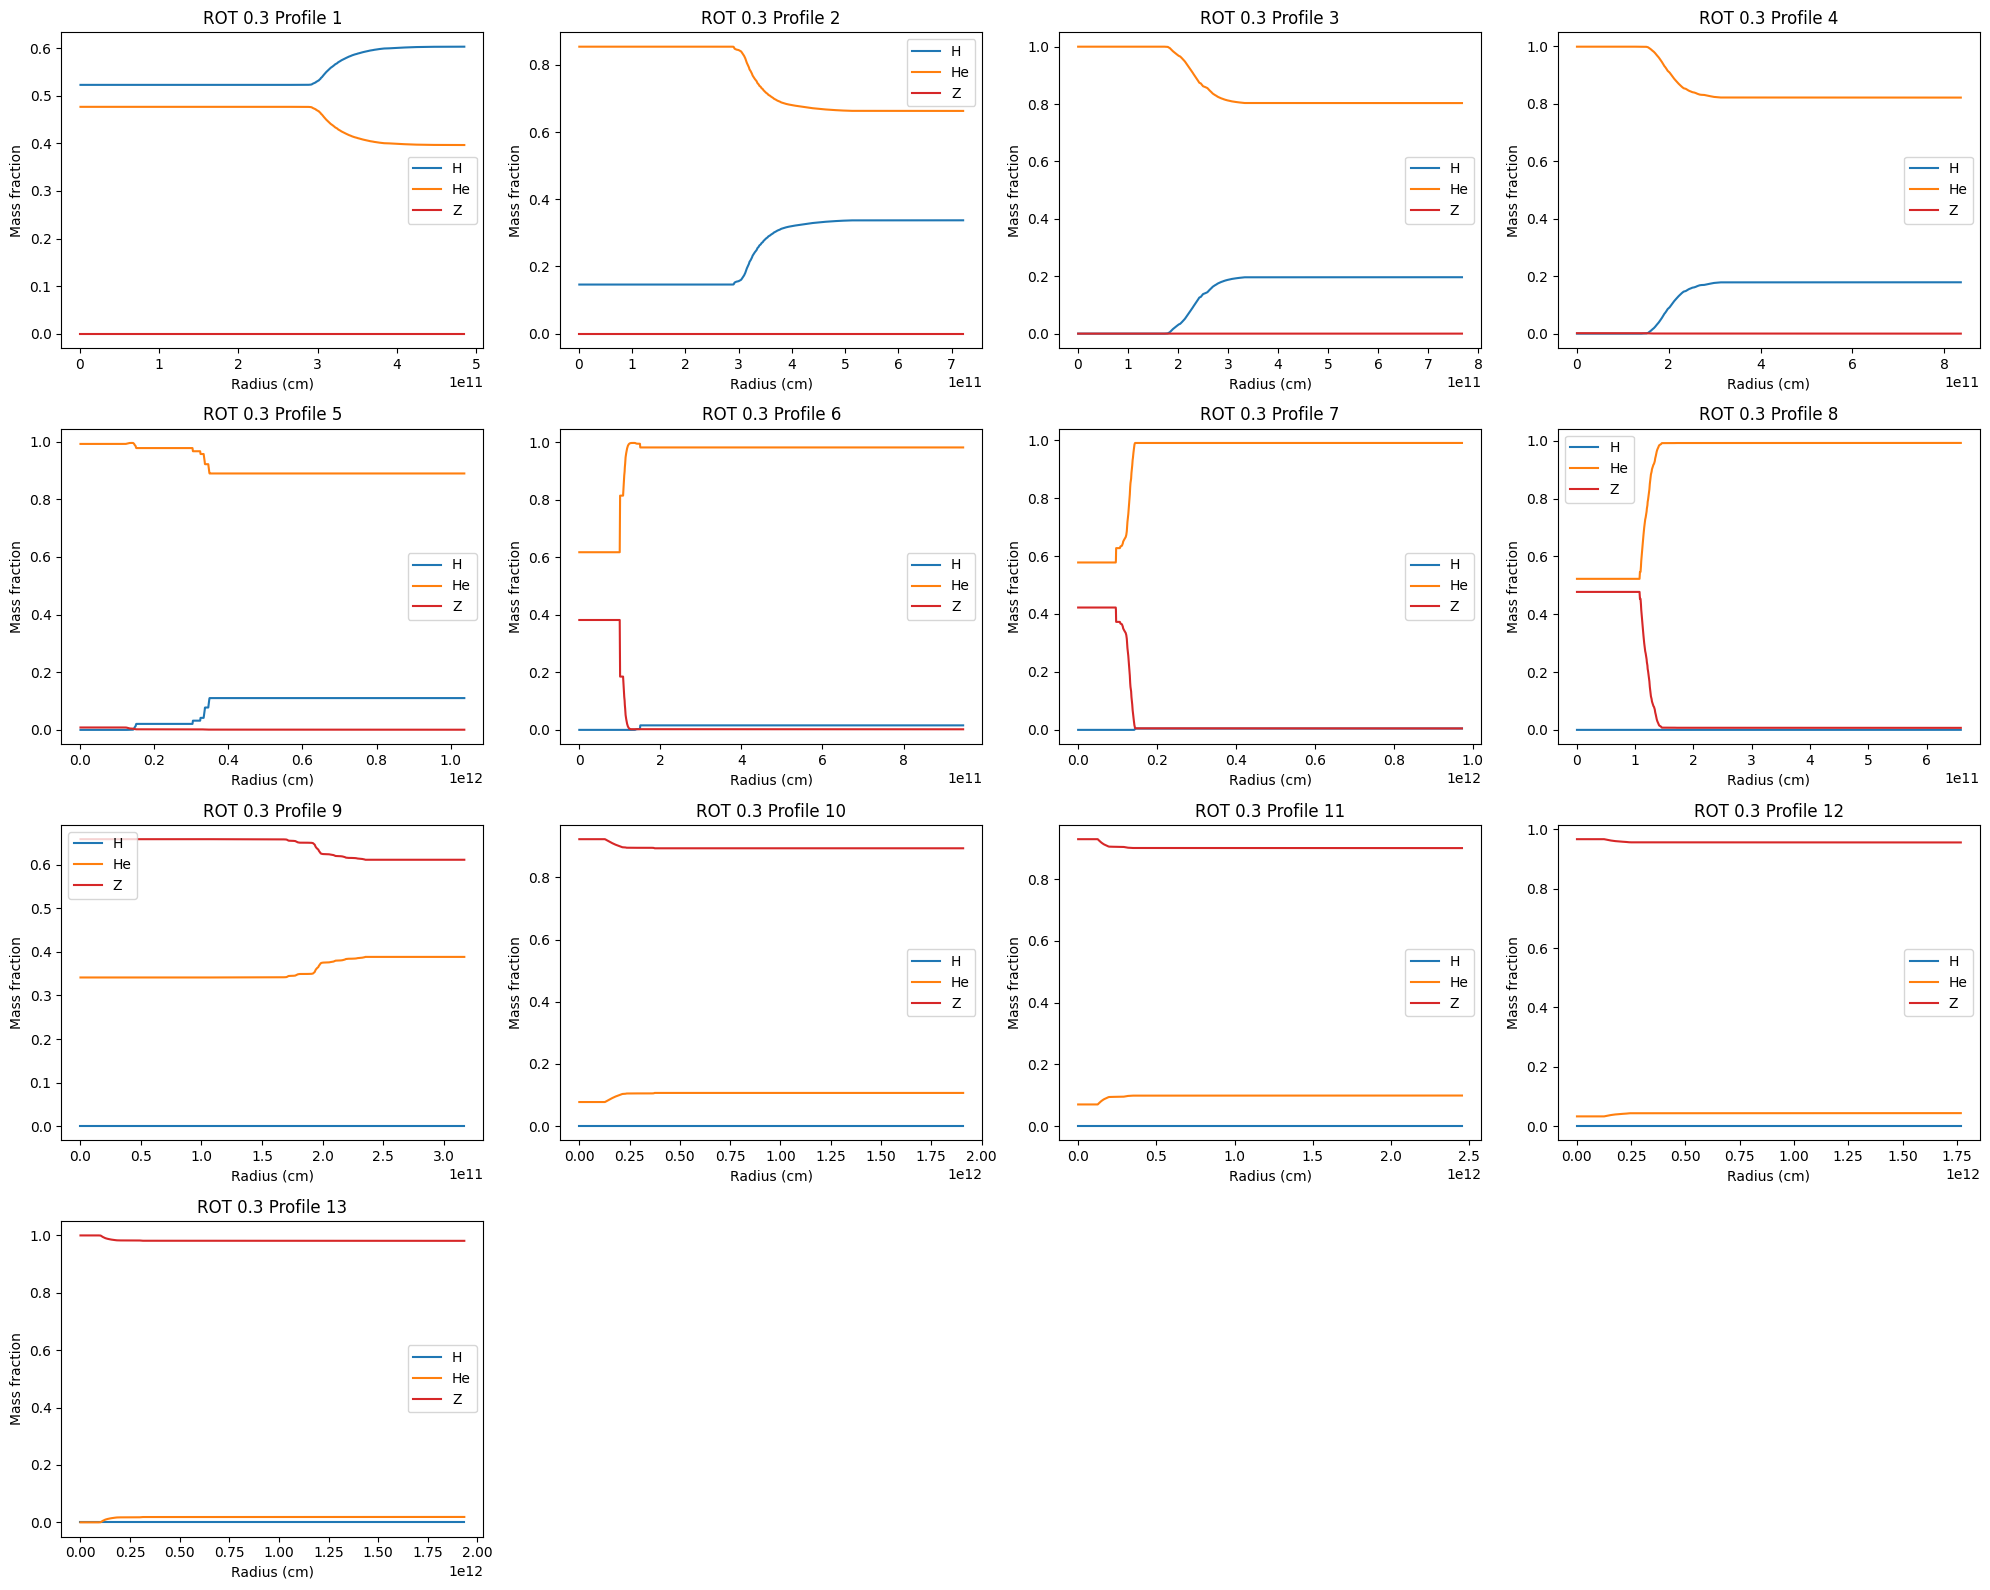

In [6]:
profiles = [mr.MesaData(f"LOGS_ROT_0.4/profile{i}.data") for i in range(1, 14)]
plot_mass_frac(profiles, group_name="ROT 0.3")